In [15]:
# Librerias para manejo de datos
import pandas as pd
import random
import numpy as np
import sklearn
# Librerias para preprocesamiento y visualizacion de datos
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Librerias para implementar redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

# Preparando informacion


In [16]:
data = pd.read_csv('data/dataset_clean.csv')
data.head()

,title,production_date,runtime_minutes,director,average_rating,num_votes,approval_index,prod_budget,domestic_gross,worldwide_gross,...,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,Avatar: The Way of Water,1670544000,192.0,664,7.8,277543.0,7.061101,460000000,667830256,2265935552,...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: On Stranger Tides,1305849600,137.0,1445,6.6,533763.0,6.272064,379000000,241071802,1045713802,...,0,0,0,0,0,0,0,0,0,0
2,Avengers: Age of Ultron,1429660800,141.0,899,7.3,870573.0,7.214013,365000000,459005868,1395316979,...,0,0,0,0,0,1,0,0,0,0
3,Justice League,1510531200,120.0,1829,6.1,456977.0,5.717212,300000000,229024295,655945209,...,0,0,0,0,0,0,0,0,0,0
4,Spectre,1444089600,148.0,1531,6.8,445461.0,6.375644,300000000,200074175,879077344,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X = data[['prod_budget', 'domestic_gross', 'worldwide_gross', 'director', 'runtime_minutes', 'approval_index', 'num_votes']]
y = data[['average_rating']]
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)
train_labels, train_samples = shuffle(y_train,X_train )

seed_value = 2302
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
sklearn.utils.check_random_state(seed_value)


RandomState(MT19937) at 0x112570840

# Modelos

## Modelo 1

In [18]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dense(1, ) 
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                128       
                                                                 
 batch_normalization_11 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_16 (Dense)            (None, 128)               2176      
                                                                 
 batch_normalization_12 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_13 (Ba  (None, 64)               

In [28]:
model.compile(
    optimizer='adam', loss='mean_squared_error', 
    metrics=['mean_squared_error']
)
batched_history = model.fit(x=train_samples, y=train_labels, batch_size=40, epochs=200, validation_split=0.2 ,verbose=2)

Epoch 1/200
65/65 - 1s - loss: 0.6975 - mean_squared_error: 0.6975 - val_loss: 0.9120 - val_mean_squared_error: 0.9120 - 527ms/epoch - 8ms/step
Epoch 2/200
65/65 - 0s - loss: 0.6793 - mean_squared_error: 0.6793 - val_loss: 0.8830 - val_mean_squared_error: 0.8830 - 75ms/epoch - 1ms/step
Epoch 3/200
65/65 - 0s - loss: 0.7050 - mean_squared_error: 0.7050 - val_loss: 0.8586 - val_mean_squared_error: 0.8586 - 72ms/epoch - 1ms/step
Epoch 4/200
65/65 - 0s - loss: 0.6951 - mean_squared_error: 0.6951 - val_loss: 0.9164 - val_mean_squared_error: 0.9164 - 75ms/epoch - 1ms/step
Epoch 5/200
65/65 - 0s - loss: 0.6872 - mean_squared_error: 0.6872 - val_loss: 1.0276 - val_mean_squared_error: 1.0276 - 73ms/epoch - 1ms/step
Epoch 6/200
65/65 - 0s - loss: 0.6936 - mean_squared_error: 0.6936 - val_loss: 0.8892 - val_mean_squared_error: 0.8892 - 74ms/epoch - 1ms/step
Epoch 7/200
65/65 - 0s - loss: 0.6994 - mean_squared_error: 0.6994 - val_loss: 0.8801 - val_mean_squared_error: 0.8801 - 72ms/epoch - 1ms/ste

### Evaluando el modelo


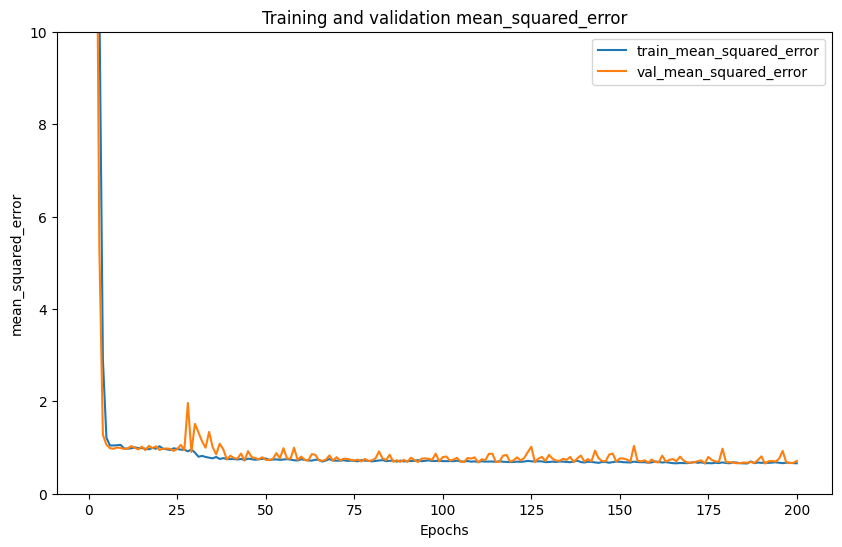

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
def plot_metric(history, metric):
		plt.figure(figsize=(10, 6))
		train_metrics = history.history[metric]
		val_metrics = history.history['val_'+metric]
		epochs = range(1, len(train_metrics) + 1)
		plt.plot(epochs, train_metrics)
		plt.plot(epochs, val_metrics)
		plt.title('Training and validation '+ metric)
		plt.xlabel("Epochs")
		plt.ylabel(metric)
		plt.legend(["train_"+metric, 'val_'+metric])
		plt.ylim([0,10])
		plt.show()

plot_metric(batched_history, 'mean_squared_error')

### Predicciones

In [21]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("test loss, test mse:", results)
predictions = model.predict(X_test)



Evaluate on test data
test loss, test mse: [0.631509006023407, 0.631509006023407]
26/26 [==============================] - 0s 536us/step


## Modelo 2

In [24]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
		BatchNormalization(),
    Dense(64, activation='relu'),
		BatchNormalization(),
    Dense(32, activation='tanh'),
		BatchNormalization(),
    Dense(1) 
])
model.summary()
early_stopping = EarlyStopping(
    monitor='mean_absolute_error', 
    patience=20, 
    restore_best_weights=True,
)
model.compile(
    optimizer='adam', loss='mean_absolute_error', 
    metrics=['mean_absolute_error']
)
batched_history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=1,
    callbacks=[early_stopping] 
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                128       
                                                                 
 batch_normalization_19 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_26 (Dense)            (None, 128)               2176      
                                                                 
 batch_normalization_20 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_21 (Ba  (None, 64)               

### Evaluando Modelo

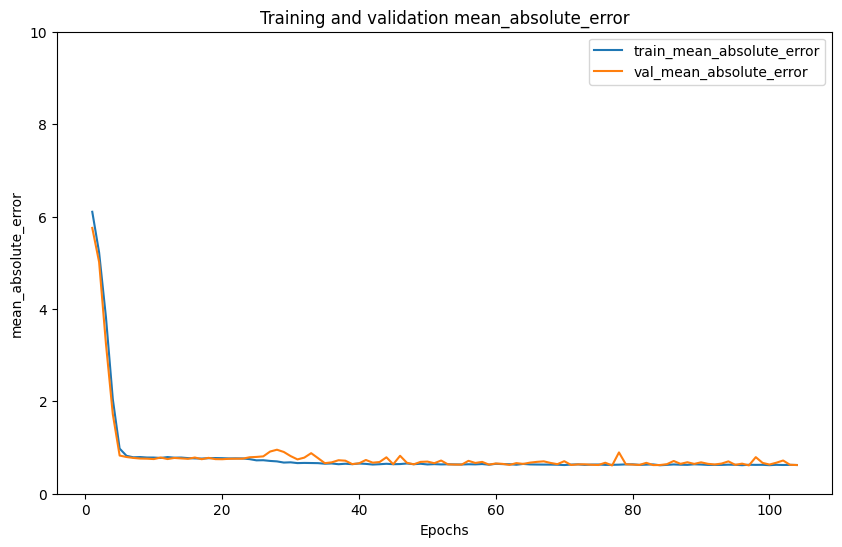

Evaluate on test data
test loss, test mean_absolute_error: [0.5922215580940247, 0.5922215580940247]
26/26 [==============================] - 0s 545us/step


array([[5.7027273],
       [5.821857 ],
       [5.7617617],
       [6.6566315],
       [7.110508 ],
       [5.8264084],
       [6.3796177],
       [6.000452 ],
       [6.1728897],
       [6.091843 ],
       [6.588979 ],
       [6.701055 ],
       [6.034992 ],
       [7.317955 ],
       [6.054735 ],
       [6.273559 ],
       [7.496921 ],
       [6.0267544],
       [6.1591544],
       [6.1269693],
       [7.4006753],
       [7.151312 ],
       [6.2551613],
       [6.3676524],
       [7.085664 ],
       [6.6074495],
       [6.3848457],
       [5.795295 ],
       [6.1469154],
       [6.7551146],
       [5.4688044],
       [7.0480766],
       [8.626939 ],
       [6.956908 ],
       [6.3160834],
       [5.5734663],
       [5.6661615],
       [7.6006403],
       [5.7538166],
       [5.967081 ],
       [5.512277 ],
       [6.4968987],
       [5.870377 ],
       [6.023689 ],
       [6.7114635],
       [5.8652205],
       [6.2828684],
       [5.7889304],
       [5.892418 ],
       [8.009325 ],


In [23]:
plot_metric(batched_history, 'mean_absolute_error')
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("test loss, test mean_absolute_error:", results)
predictions = model.predict(X_test)
predictions

## Modelo 3

In [27]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
		BatchNormalization(),
    Dense(64, activation='relu'),
		Dropout(0.2),
		BatchNormalization(),
    Dense(128, activation='tanh'),

    Dense(1) 
])
model.summary()
model.compile(
    optimizer='adam', loss='huber_loss', 
    metrics=['mean_absolute_error']
)
batched_history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=1,
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                128       
                                                                 
 batch_normalization_26 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_36 (Dense)            (None, 128)               2176      
                                                                 
 batch_normalization_27 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

### Evaluando Modelo

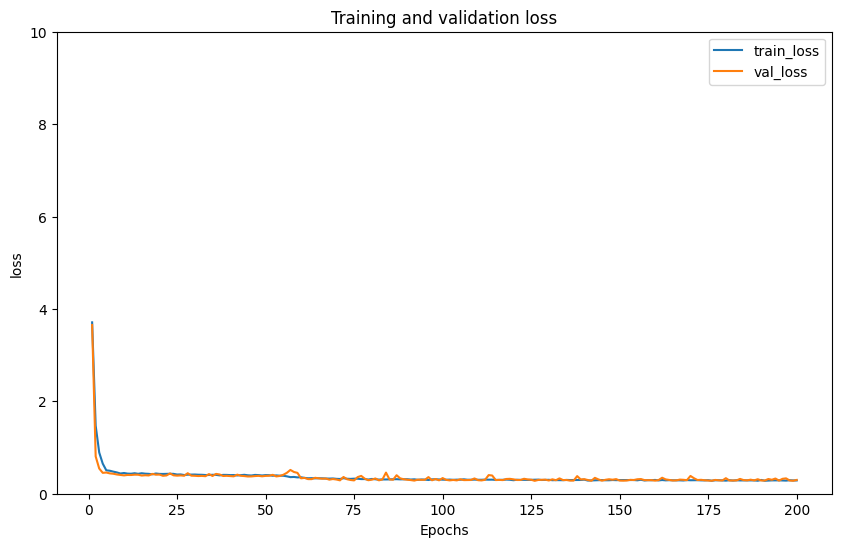

Evaluate on test data
test loss: 0.2749007046222687
26/26 [==============================] - 0s 502us/step


array([[5.7644444],
       [6.0511017],
       [5.99277  ],
       [6.589176 ],
       [6.962758 ],
       [6.2272196],
       [6.3608418],
       [6.015021 ],
       [6.3170533],
       [6.347922 ],
       [7.310725 ],
       [6.9466496],
       [6.097909 ],
       [7.285134 ],
       [6.1204715],
       [6.0324154],
       [7.040827 ],
       [6.3119755],
       [6.209301 ],
       [6.1586757],
       [7.009878 ],
       [6.8139563],
       [6.330839 ],
       [6.4047456],
       [6.976444 ],
       [6.3748064],
       [6.42628  ],
       [5.7745676],
       [6.415073 ],
       [6.565295 ],
       [5.8018904],
       [7.081027 ],
       [8.473581 ],
       [6.6746254],
       [6.3630295],
       [5.921402 ],
       [5.9260836],
       [7.679769 ],
       [6.218391 ],
       [6.1218786],
       [5.748888 ],
       [6.4265504],
       [6.294919 ],
       [5.8127446],
       [6.8277817],
       [6.102891 ],
       [6.514476 ],
       [5.9586744],
       [6.300798 ],
       [7.977098 ],


In [26]:
plot_metric(batched_history, 'loss')
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("test loss:", results[0])
predictions = model.predict(X_test)
predictions